# Chapter 1: Atoms in 3D Space - Foundations

## Learning Objectives
- Understand how atoms are represented computationally
- Master Cartesian coordinate systems for atomic positions
- Learn to calculate distances, angles, and dihedrals
- Visualize atomic structures using matplotlib

---

## 1.1 The Computational Atom

In computational chemistry and materials science, an atom is fundamentally described by:

1. **Identity**: What element is it? (Atomic number Z, or element symbol)
2. **Position**: Where is it in 3D space? (x, y, z coordinates)
3. **Additional properties**: Mass, charge, velocity (for dynamics), etc.

### The Cartesian Coordinate System

We use a right-handed Cartesian coordinate system:
- **x-axis**: Points to the right
- **y-axis**: Points upward (or forward, depending on convention)
- **z-axis**: Points out of the screen (completing the right-hand rule)

The **right-hand rule**: If you curl your fingers from x to y, your thumb points in the z direction.

### Units in Computational Chemistry

| Unit System | Length Unit | Common Usage |
|-------------|-------------|-------------|
| SI | meters (m) | Rarely used directly |
| CGS | centimeters (cm) | Historical |
| **Ångström (Å)** | 10⁻¹⁰ m | Most common in chemistry |
| Bohr (a₀) | 0.529177 Å | Quantum chemistry codes |
| nm | 10⁻⁹ m | Nanomaterials |

**We will primarily use Ångströms (Å) throughout this course.**

In [1]:
# Essential imports for the entire course
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import List, Tuple, Dict, Optional
import math

# Set up nice plotting defaults
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

print("Environment ready! NumPy version:", np.__version__)

Environment ready! NumPy version: 1.26.4


## 1.2 Representing a Single Atom

The simplest representation of an atom is a tuple or dictionary containing its symbol and position:

In [2]:
# Method 1: Simple tuple representation
# (symbol, x, y, z)
hydrogen_tuple = ('H', 0.0, 0.0, 0.0)

# Method 2: Dictionary representation (more explicit)
hydrogen_dict = {
    'symbol': 'H',
    'position': np.array([0.0, 0.0, 0.0]),
    'atomic_number': 1,
    'mass': 1.008  # atomic mass units (amu)
}

# Method 3: Using NumPy arrays for positions (RECOMMENDED)
# This allows vectorized operations
class Atom:
    """A simple atom class for computational chemistry."""
    
    # Periodic table data (partial)
    ELEMENTS = {
        'H':  {'Z': 1,  'mass': 1.008,   'color': 'white',  'radius': 0.31},
        'He': {'Z': 2,  'mass': 4.003,   'color': 'cyan',   'radius': 0.28},
        'Li': {'Z': 3,  'mass': 6.941,   'color': 'violet', 'radius': 1.28},
        'Be': {'Z': 4,  'mass': 9.012,   'color': 'green',  'radius': 0.96},
        'B':  {'Z': 5,  'mass': 10.81,   'color': 'salmon', 'radius': 0.84},
        'C':  {'Z': 6,  'mass': 12.011,  'color': 'black',  'radius': 0.76},
        'N':  {'Z': 7,  'mass': 14.007,  'color': 'blue',   'radius': 0.71},
        'O':  {'Z': 8,  'mass': 15.999,  'color': 'red',    'radius': 0.66},
        'F':  {'Z': 9,  'mass': 18.998,  'color': 'green',  'radius': 0.57},
        'Ne': {'Z': 10, 'mass': 20.180,  'color': 'cyan',   'radius': 0.58},
        'Na': {'Z': 11, 'mass': 22.990,  'color': 'violet', 'radius': 1.66},
        'Mg': {'Z': 12, 'mass': 24.305,  'color': 'green',  'radius': 1.41},
        'Al': {'Z': 13, 'mass': 26.982,  'color': 'gray',   'radius': 1.21},
        'Si': {'Z': 14, 'mass': 28.086,  'color': 'gold',   'radius': 1.11},
        'P':  {'Z': 15, 'mass': 30.974,  'color': 'orange', 'radius': 1.07},
        'S':  {'Z': 16, 'mass': 32.065,  'color': 'yellow', 'radius': 1.05},
        'Cl': {'Z': 17, 'mass': 35.453,  'color': 'green',  'radius': 1.02},
        'Ar': {'Z': 18, 'mass': 39.948,  'color': 'cyan',   'radius': 1.06},
        'K':  {'Z': 19, 'mass': 39.098,  'color': 'violet', 'radius': 2.03},
        'Ca': {'Z': 20, 'mass': 40.078,  'color': 'green',  'radius': 1.76},
        'Fe': {'Z': 26, 'mass': 55.845,  'color': 'orange', 'radius': 1.32},
        'Cu': {'Z': 29, 'mass': 63.546,  'color': 'brown',  'radius': 1.40},
        'Zn': {'Z': 30, 'mass': 65.38,   'color': 'gray',   'radius': 1.22},
        'Au': {'Z': 79, 'mass': 196.967, 'color': 'gold',   'radius': 1.36},
        'Pt': {'Z': 78, 'mass': 195.084, 'color': 'silver', 'radius': 1.39},
    }
    
    def __init__(self, symbol: str, position: np.ndarray):
        """Initialize an atom with its symbol and position.
        
        Args:
            symbol: Chemical element symbol (e.g., 'H', 'C', 'O')
            position: 3D coordinates as numpy array [x, y, z] in Ångströms
        """
        self.symbol = symbol
        self.position = np.array(position, dtype=float)
        
        # Look up element properties
        if symbol in self.ELEMENTS:
            props = self.ELEMENTS[symbol]
            self.atomic_number = props['Z']
            self.mass = props['mass']
            self.color = props['color']
            self.covalent_radius = props['radius']
        else:
            raise ValueError(f"Unknown element: {symbol}")
    
    def __repr__(self):
        return f"Atom('{self.symbol}', {self.position})"
    
    def distance_to(self, other: 'Atom') -> float:
        """Calculate distance to another atom in Ångströms."""
        return np.linalg.norm(self.position - other.position)

# Create some atoms
h1 = Atom('H', [0.0, 0.0, 0.0])
h2 = Atom('H', [0.74, 0.0, 0.0])  # H-H bond length is ~0.74 Å

print(f"Atom 1: {h1}")
print(f"Atom 2: {h2}")
print(f"H-H distance: {h1.distance_to(h2):.3f} Å")

Atom 1: Atom('H', [0. 0. 0.])
Atom 2: Atom('H', [0.74 0.   0.  ])
H-H distance: 0.740 Å


### Quick Note: What is `__repr__`?

The `__repr__` method is a **special method** (also called "dunder" or "magic" method) in Python. The double underscores signal that Python itself will call this method automatically.

**Purpose**: It defines what gets displayed when you print an object or inspect it:
```python
h1 = Atom('H', [0.0, 0.0, 0.0])
print(h1)  # Calls __repr__ → Atom('H', [0. 0. 0.])
```

Without it, you'd see something unhelpful like `<__main__.Atom object at 0x7f...>`.

**Common dunder methods**:
| Method | Called by |
|--------|-----------|
| `__init__` | `Atom(...)` (constructor) |
| `__repr__` | `print(obj)`, `repr(obj)` |
| `__len__` | `len(obj)` |
| `__add__` | `obj + other` |
| `__getitem__` | `obj[i]` |

In [3]:
h1

Atom('H', [0. 0. 0.])

## 1.3 The Mathematics of Distance

### Euclidean Distance in 3D

The distance between two points $\mathbf{r}_1 = (x_1, y_1, z_1)$ and $\mathbf{r}_2 = (x_2, y_2, z_2)$ is:

$$d = |\mathbf{r}_2 - \mathbf{r}_1| = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 + (z_2-z_1)^2}$$

In vector notation, if $\mathbf{d} = \mathbf{r}_2 - \mathbf{r}_1$, then:

$$d = |\mathbf{d}| = \sqrt{\mathbf{d} \cdot \mathbf{d}}$$

### Implementation

In [4]:
def distance(r1: np.ndarray, r2: np.ndarray) -> float:
    """Calculate Euclidean distance between two points.
    
    Args:
        r1: First position vector [x, y, z]
        r2: Second position vector [x, y, z]
    
    Returns:
        Distance in the same units as input
    """
    diff = r2 - r1
    return np.sqrt(np.dot(diff, diff))

# Equivalent using numpy's built-in norm
def distance_numpy(r1: np.ndarray, r2: np.ndarray) -> float:
    """Calculate distance using numpy's norm function."""
    return np.linalg.norm(r2 - r1)

# Example: Water molecule (H2O)
# Typical geometry: O-H bond length = 0.96 Å, H-O-H angle = 104.5°
O_pos = np.array([0.0, 0.0, 0.0])
H1_pos = np.array([0.96, 0.0, 0.0])

# For H2, we need to rotate by 104.5 degrees
angle_rad = np.radians(104.5)
H2_pos = np.array([0.96 * np.cos(angle_rad), 0.96 * np.sin(angle_rad), 0.0])

print("Water molecule geometry:")
print(f"O position:  {O_pos}")
print(f"H1 position: {H1_pos}")
print(f"H2 position: {H2_pos}")
print(f"\nO-H1 distance: {distance(O_pos, H1_pos):.4f} Å")
print(f"O-H2 distance: {distance(O_pos, H2_pos):.4f} Å")
print(f"H1-H2 distance: {distance(H1_pos, H2_pos):.4f} Å")

Water molecule geometry:
O position:  [0. 0. 0.]
H1 position: [0.96 0.   0.  ]
H2 position: [-0.2403648   0.92942173  0.        ]

O-H1 distance: 0.9600 Å
O-H2 distance: 0.9600 Å
H1-H2 distance: 1.5181 Å


### Quick Note: Why cos(θ) for x and sin(θ) for y?

This comes from the **unit circle definition** of trigonometric functions:

```
                y
                ↑
                |     • P = (cos θ, sin θ)
                |    /|
                |   / |
              1 |  /  | sin θ
                | /θ  |
        ────────┼─────┴────→ x
                |  cos θ
                |
```

For a point P at angle θ from the positive x-axis, at distance r from origin:
- **x = r · cos(θ)** — horizontal projection
- **y = r · sin(θ)** — vertical projection

**Memory trick**: 
- **C**osine → **C**olumn (x, the horizontal)
- **S**ine → **S**tack up (y, the vertical)

So for H2 at distance 0.96 Å and angle 104.5°:
```python
x = 0.96 * cos(104.5°) ≈ -0.24 Å  # negative because angle > 90°
y = 0.96 * sin(104.5°) ≈  0.93 Å  # positive (above x-axis)
```

## 1.4 Bond Angles

### The Mathematics of Angles

The angle between three atoms A-B-C (with B at the vertex) uses the **dot product**:

$$\cos(\theta) = \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{|\mathbf{v}_1| |\mathbf{v}_2|}$$

Where:
- $\mathbf{v}_1 = \mathbf{r}_A - \mathbf{r}_B$ (vector from B to A)
- $\mathbf{v}_2 = \mathbf{r}_C - \mathbf{r}_B$ (vector from B to C)

### Dot Product Review

The dot product of two vectors $\mathbf{a}$ and $\mathbf{b}$:

$$\mathbf{a} \cdot \mathbf{b} = a_x b_x + a_y b_y + a_z b_z = |\mathbf{a}||\mathbf{b}|\cos(\theta)$$

Key properties:
- If $\theta = 0°$: $\mathbf{a} \cdot \mathbf{b} = |\mathbf{a}||\mathbf{b}|$ (parallel)
- If $\theta = 90°$: $\mathbf{a} \cdot \mathbf{b} = 0$ (perpendicular)
- If $\theta = 180°$: $\mathbf{a} \cdot \mathbf{b} = -|\mathbf{a}||\mathbf{b}|$ (anti-parallel)

In [5]:
def angle(r1: np.ndarray, r2: np.ndarray, r3: np.ndarray, degrees: bool = True) -> float:
    """Calculate the angle formed by three points (angle at r2).
    
    Args:
        r1: Position of first atom
        r2: Position of central atom (vertex)
        r3: Position of third atom
        degrees: If True, return angle in degrees; else radians
    
    Returns:
        Angle at r2 in degrees or radians
    """
    # Vectors from central atom to the other two
    v1 = r1 - r2
    v2 = r3 - r2
    
    # Normalize the vectors
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)
    
    # Calculate cosine of angle using dot product
    cos_angle = np.dot(v1_norm, v2_norm)
    
    # Clamp to [-1, 1] to handle numerical errors
    cos_angle = np.clip(cos_angle, -1.0, 1.0)
    
    # Calculate angle
    angle_rad = np.arccos(cos_angle)
    
    if degrees:
        return np.degrees(angle_rad)
    return angle_rad

# Test with our water molecule
print(f"H-O-H angle in water: {angle(H1_pos, O_pos, H2_pos):.1f}°")

# Test with known geometries
# Linear molecule (180°)
linear_a = np.array([-1, 0, 0])
linear_b = np.array([0, 0, 0])
linear_c = np.array([1, 0, 0])
print(f"Linear angle: {angle(linear_a, linear_b, linear_c):.1f}°")

# Right angle (90°)
right_a = np.array([1, 0, 0])
right_b = np.array([0, 0, 0])
right_c = np.array([0, 1, 0])
print(f"Right angle: {angle(right_a, right_b, right_c):.1f}°")

H-O-H angle in water: 104.5°
Linear angle: 180.0°
Right angle: 90.0°


### Quick Note: Why Normalize for Angles but Not for Distances?

**For distances — normalization destroys what we need:**
```
A ────────────────────── B      Distance = 5 Å
A ──── B                        Distance = 2 Å
```
The vector from A to B **IS** the distance information. If we normalize, we get length 1 always — we've lost the answer!

**For angles — we only care about direction:**
```
        B                           B
       /                           /
      /  θ                        /  θ    ← SAME ANGLE!
     /                           /
    A ──── C                    A ──────────── C
    
    (short vectors)              (long vectors)
```
The angle θ is identical whether vectors are short or long. Stretching doesn't change direction.

**The math shows why:**

The angle formula requires dividing by magnitudes anyway:
$$\cos(\theta) = \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{|\mathbf{v}_1| |\mathbf{v}_2|}$$

If we normalize first (make $|\mathbf{v}| = 1$), the denominator becomes $1 \times 1 = 1$, simplifying the calculation.

| Operation | What we measure | Does length matter? | Normalize? |
|-----------|-----------------|---------------------|------------|
| Distance | Length of vector | YES — it's the answer! | NO |
| Angle | Direction between vectors | NO — same at any length | Optional (simplifies math) |

## 1.5 Dihedral (Torsion) Angles

### Understanding Dihedral Angles

A dihedral angle describes the rotation around a bond. Given four atoms A-B-C-D:
- The dihedral angle is the angle between the planes ABC and BCD
- It describes how atom D is positioned relative to atom A when looking down the B-C bond

### The Mathematics

We use the **cross product** to find normal vectors to each plane:

1. $\mathbf{b}_1 = \mathbf{r}_B - \mathbf{r}_A$ (A→B vector)
2. $\mathbf{b}_2 = \mathbf{r}_C - \mathbf{r}_B$ (B→C vector, the rotation axis)
3. $\mathbf{b}_3 = \mathbf{r}_D - \mathbf{r}_C$ (C→D vector)

Normal vectors to the planes:
- $\mathbf{n}_1 = \mathbf{b}_1 \times \mathbf{b}_2$ (normal to ABC plane)
- $\mathbf{n}_2 = \mathbf{b}_2 \times \mathbf{b}_3$ (normal to BCD plane)

### Computing the Dihedral Angle from Plane Normals

Once we have $\mathbf{n}_1$ and $\mathbf{n}_2$, the dihedral angle is the angle between them. However, we need a **signed angle** (range -180° to +180°) to distinguish clockwise from counterclockwise rotation.

**The naive approach (unsigned):**
$$\cos(\phi) = \frac{\mathbf{n}_1 \cdot \mathbf{n}_2}{|\mathbf{n}_1||\mathbf{n}_2|}$$

This gives $\phi \in [0°, 180°]$ but loses the sign — we can't tell if D is rotated clockwise or counterclockwise from A.

**The signed approach using atan2:**

We construct an orthonormal frame using $\mathbf{n}_1$ and the bond axis $\hat{\mathbf{b}}_2$:

$$\mathbf{m}_1 = \mathbf{n}_1 \times \hat{\mathbf{b}}_2$$

This gives us two perpendicular axes in the plane perpendicular to the bond:
- $\hat{\mathbf{n}}_1$ (one direction)
- $\mathbf{m}_1$ (90° rotated from $\hat{\mathbf{n}}_1$ around the bond)

Now we project $\hat{\mathbf{n}}_2$ onto this frame:
$$x = \hat{\mathbf{n}}_1 \cdot \hat{\mathbf{n}}_2 \quad \text{(cosine component)}$$
$$y = \mathbf{m}_1 \cdot \hat{\mathbf{n}}_2 \quad \text{(sine component)}$$

The signed dihedral angle is:
$$\phi = \text{atan2}(y, x)$$

**Why atan2?** Unlike arccos, `atan2(y, x)` returns angles in the full range $(-\pi, \pi]$ with the correct sign based on which quadrant $(x, y)$ falls in.

### Cross Product Review

$$\mathbf{a} \times \mathbf{b} = \begin{vmatrix} \mathbf{i} & \mathbf{j} & \mathbf{k} \\ a_x & a_y & a_z \\ b_x & b_y & b_z \end{vmatrix}$$

$$= (a_y b_z - a_z b_y)\mathbf{i} - (a_x b_z - a_z b_x)\mathbf{j} + (a_x b_y - a_y b_x)\mathbf{k}$$

Key properties:
- Result is perpendicular to both input vectors
- Magnitude = $|\mathbf{a}||\mathbf{b}|\sin(\theta)$
- Direction follows right-hand rule

In [6]:
def dihedral(r1: np.ndarray, r2: np.ndarray, r3: np.ndarray, r4: np.ndarray, 
             degrees: bool = True) -> float:
    """Calculate the dihedral angle for four atoms.
    
    The dihedral angle is the angle between planes r1-r2-r3 and r2-r3-r4.
    
    Args:
        r1, r2, r3, r4: Positions of four atoms defining the dihedral
        degrees: If True, return angle in degrees; else radians
    
    Returns:
        Dihedral angle (range: -180° to 180°)
    """
    # Calculate bond vectors
    b1 = r2 - r1  # A → B
    b2 = r3 - r2  # B → C (rotation axis)
    b3 = r4 - r3  # C → D
    
    # Calculate normal vectors to planes using cross product
    n1 = np.cross(b1, b2)  # Normal to plane ABC
    n2 = np.cross(b2, b3)  # Normal to plane BCD
    
    # Normalize the normal vectors
    n1 = n1 / np.linalg.norm(n1)
    n2 = n2 / np.linalg.norm(n2)
    
    # Calculate the unit vector along b2
    m1 = np.cross(n1, b2 / np.linalg.norm(b2))
    
    # Calculate dihedral using atan2 for correct sign
    x = np.dot(n1, n2)
    y = np.dot(m1, n2)
    
    dihedral_rad = np.arctan2(y, x)
    
    if degrees:
        return np.degrees(dihedral_rad)
    return dihedral_rad

# Example: Butane conformations
# C1-C2-C3-C4 with different dihedrals

# Anti (trans) conformation: 180°
c1 = np.array([0.0, 0.0, 0.0])
c2 = np.array([1.54, 0.0, 0.0])  # C-C bond = 1.54 Å
c3 = np.array([2.31, 1.26, 0.0])  # ~109.5° angle
c4_trans = np.array([3.85, 1.26, 0.0])  # Trans/anti

print(f"Trans/anti dihedral: {dihedral(c1, c2, c3, c4_trans):.1f}°")

# Gauche conformation: ~60°
c4_gauche = np.array([2.31 + 1.54*np.cos(np.radians(60)), 
                      1.26 + 1.54*np.sin(np.radians(60))*np.cos(np.radians(30)),
                      1.54*np.sin(np.radians(60))*np.sin(np.radians(30))])

print(f"Gauche dihedral: {dihedral(c1, c2, c3, c4_gauche):.1f}°")

Trans/anti dihedral: 180.0°
Gauche dihedral: -94.7°


## 1.6 Building a Molecule Collection

Now let's create a class to hold multiple atoms - a molecule or structure:

In [8]:
class Structure:
    """A collection of atoms representing a molecule or crystal structure."""
    
    def __init__(self, name: str = "unnamed"):
        self.name = name
        self.atoms: List[Atom] = []
    
    def add_atom(self, symbol: str, position: np.ndarray) -> None:
        """Add an atom to the structure."""
        self.atoms.append(Atom(symbol, position))
    
    def __len__(self) -> int:
        return len(self.atoms)
    
    def __repr__(self) -> str:
        return f"Structure('{self.name}', {len(self)} atoms)"
    
    def get_positions(self) -> np.ndarray:
        """Return all atomic positions as an Nx3 array."""
        return np.array([atom.position for atom in self.atoms])
    
    def get_symbols(self) -> List[str]:
        """Return list of atomic symbols."""
        return [atom.symbol for atom in self.atoms]
    
    def get_center_of_mass(self) -> np.ndarray:
        """Calculate the center of mass."""
        total_mass = sum(atom.mass for atom in self.atoms)
        weighted_pos = sum(atom.mass * atom.position for atom in self.atoms)
        return weighted_pos / total_mass
    
    def get_geometric_center(self) -> np.ndarray:
        """Calculate the geometric center (centroid)."""
        return np.mean(self.get_positions(), axis=0)
    
    def translate(self, vector: np.ndarray) -> None:
        """Translate all atoms by a vector."""
        for atom in self.atoms:
            atom.position += vector
    
    def center_at_origin(self, use_com: bool = True) -> None:
        """Center the structure at the origin.
        
        Args:
            use_com: If True, use center of mass; else geometric center
        """
        if use_com:
            center = self.get_center_of_mass()
        else:
            center = self.get_geometric_center()
        self.translate(-center)

# Build a water molecule
water = Structure("H2O")
water.add_atom('O', [0.0, 0.0, 0.0])
water.add_atom('H', [0.96, 0.0, 0.0])
water.add_atom('H', [0.96 * np.cos(np.radians(104.5)), 
                     0.96 * np.sin(np.radians(104.5)), 0.0])

print(water)
print(f"Center of mass: {water.get_center_of_mass()}")
print(f"Geometric center: {water.get_geometric_center()}")

# Center at origin
water.center_at_origin()
print(f"\nAfter centering:")
print(f"Center of mass: {water.get_center_of_mass()}")

Structure('H2O', 3 atoms)
Center of mass: [0.04026602 0.05200428 0.        ]
Geometric center: [0.2398784  0.30980724 0.        ]

After centering:
Center of mass: [0. 0. 0.]


## 1.7 Visualizing Structures

Let's create a simple 3D visualization function using matplotlib:

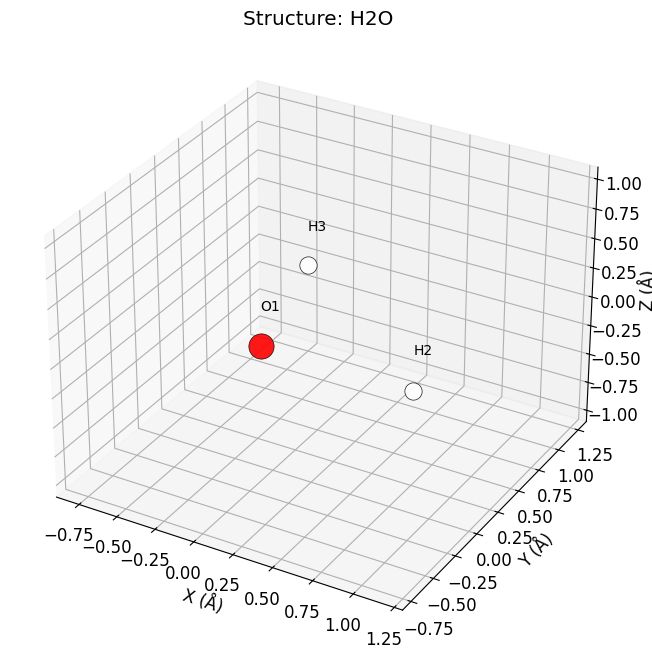

In [9]:
def plot_structure(structure: Structure, show_labels: bool = True, 
                   ax: Optional[plt.Axes] = None) -> plt.Axes:
    """Create a 3D plot of a molecular structure.
    
    Args:
        structure: The Structure object to plot
        show_labels: Whether to show atom labels
        ax: Existing 3D axes to plot on (creates new figure if None)
    
    Returns:
        The matplotlib 3D axes object
    """
    if ax is None:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
    
    # Plot each atom
    for i, atom in enumerate(structure.atoms):
        x, y, z = atom.position
        # Scale marker size by covalent radius
        size = atom.covalent_radius * 500
        ax.scatter([x], [y], [z], c=atom.color, s=size, 
                   edgecolors='black', linewidths=0.5, alpha=0.9)
        
        if show_labels:
            ax.text(x, y, z + 0.3, f"{atom.symbol}{i+1}", fontsize=10)
    
    # Set labels and title
    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Y (Å)')
    ax.set_zlabel('Z (Å)')
    ax.set_title(f"Structure: {structure.name}")
    
    # Make axes equal
    positions = structure.get_positions()
    max_range = np.max(np.ptp(positions, axis=0)) / 2 + 0.5
    center = structure.get_geometric_center()
    ax.set_xlim(center[0] - max_range, center[0] + max_range)
    ax.set_ylim(center[1] - max_range, center[1] + max_range)
    ax.set_zlim(center[2] - max_range, center[2] + max_range)
    
    return ax

# Plot the water molecule
plot_structure(water)
plt.show()

## 1.8 Building Common Molecules

Let's create some common molecular geometries:

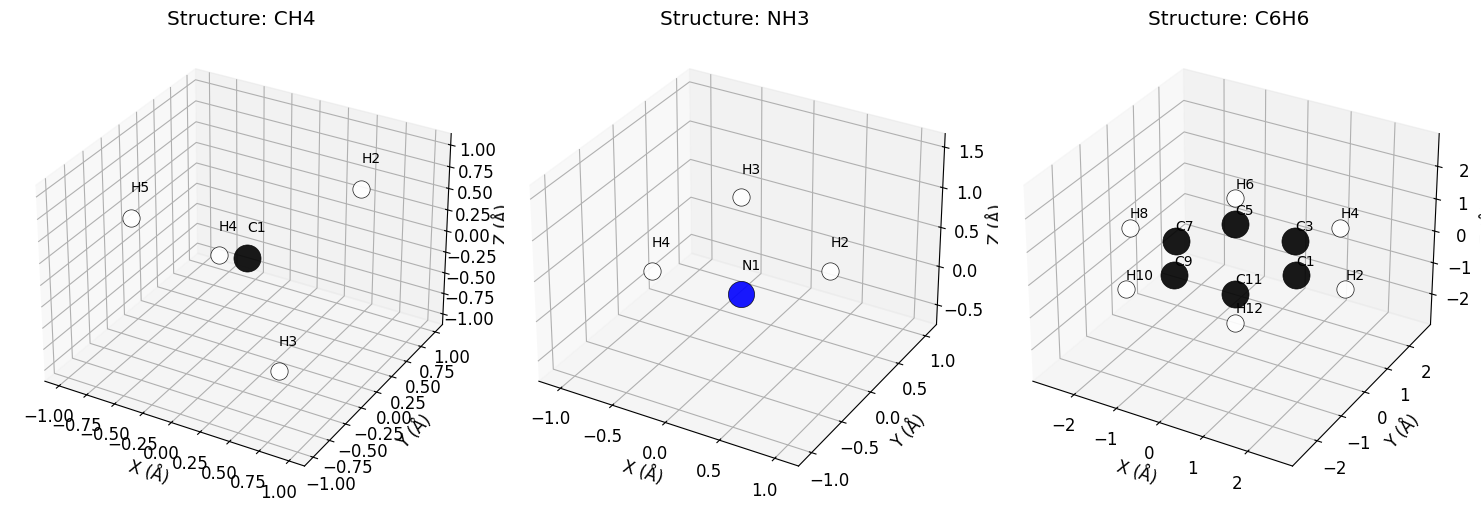


Verification:
H-C-H angle in methane: 109.47°
Expected tetrahedral angle: 109.47°


In [10]:
def build_methane() -> Structure:
    """Build a methane (CH4) molecule with tetrahedral geometry.
    
    Tetrahedral angle: arccos(-1/3) ≈ 109.47°
    C-H bond length: 1.09 Å
    """
    ch4 = Structure("CH4")
    
    # Central carbon at origin
    ch4.add_atom('C', [0.0, 0.0, 0.0])
    
    # Tetrahedral vertices
    # Using the mathematical definition of a tetrahedron inscribed in a cube
    bond_length = 1.09
    
    # The four vertices of a tetrahedron can be placed at:
    # (1,1,1), (1,-1,-1), (-1,1,-1), (-1,-1,1) normalized
    vertices = np.array([
        [1, 1, 1],
        [1, -1, -1],
        [-1, 1, -1],
        [-1, -1, 1]
    ], dtype=float)
    
    # Normalize and scale by bond length
    for v in vertices:
        v_normalized = v / np.linalg.norm(v) * bond_length
        ch4.add_atom('H', v_normalized)
    
    return ch4

def build_benzene() -> Structure:
    """Build a benzene (C6H6) molecule with planar hexagonal geometry.
    
    C-C bond length: 1.40 Å (aromatic)
    C-H bond length: 1.09 Å
    """
    benzene = Structure("C6H6")
    
    cc_bond = 1.40
    ch_bond = 1.09
    
    # Hexagon radius (distance from center to vertex)
    radius_c = cc_bond  # For a regular hexagon with side length = cc_bond
    radius_h = radius_c + ch_bond
    
    for i in range(6):
        theta = i * 60 * np.pi / 180  # 60° increments
        
        # Carbon atoms
        x_c = radius_c * np.cos(theta)
        y_c = radius_c * np.sin(theta)
        benzene.add_atom('C', [x_c, y_c, 0.0])
        
        # Hydrogen atoms
        x_h = radius_h * np.cos(theta)
        y_h = radius_h * np.sin(theta)
        benzene.add_atom('H', [x_h, y_h, 0.0])
    
    return benzene

def build_ammonia() -> Structure:
    """Build an ammonia (NH3) molecule with trigonal pyramidal geometry.
    
    N-H bond length: 1.02 Å
    H-N-H angle: 107.3°
    """
    nh3 = Structure("NH3")
    
    nh3.add_atom('N', [0.0, 0.0, 0.0])
    
    bond_length = 1.02
    angle = np.radians(107.3)
    
    # The N is at origin, H atoms are below it
    # Calculate the angle from vertical that places H atoms
    # For H-N-H = 107.3°, each N-H makes angle with z-axis
    theta = np.arccos((np.cos(angle) + 1/3) / (2/3))  # Simplified derivation
    
    # Simpler approach: place H atoms using the known geometry
    # H atoms are at 120° intervals around z-axis
    z_h = -bond_length * np.cos(np.radians(180 - 107.3/2))
    r_h = bond_length * np.sin(np.radians(180 - 107.3/2))
    
    for i in range(3):
        phi = i * 120 * np.pi / 180
        x = r_h * np.cos(phi)
        y = r_h * np.sin(phi)
        nh3.add_atom('H', [x, y, z_h])
    
    return nh3

# Build and visualize
methane = build_methane()
benzene = build_benzene()
ammonia = build_ammonia()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

plot_structure(methane, ax=axes[0])
plot_structure(ammonia, ax=axes[1])
plot_structure(benzene, ax=axes[2])

plt.tight_layout()
plt.show()

# Verify tetrahedral angle in methane
print("\nVerification:")
h_positions = [atom.position for atom in methane.atoms if atom.symbol == 'H']
c_position = methane.atoms[0].position
print(f"H-C-H angle in methane: {angle(h_positions[0], c_position, h_positions[1]):.2f}°")
print(f"Expected tetrahedral angle: {np.degrees(np.arccos(-1/3)):.2f}°")

### Quick Note: Tetrahedron Inscribed in a Cube

The tetrahedral vertices `(1,1,1), (1,-1,-1), (-1,1,-1), (-1,-1,1)` come from a beautiful geometric fact: **a regular tetrahedron can be inscribed in a cube by selecting alternating vertices**.

```
        (-1,1,1) ●━━━━━━━━━━━━━━━━● (1,1,1)    ← SELECTED
                /|              /|
               / |             / |
              /  |            /  |
   (-1,1,-1) ●━━━|━━━━━━━━━━━● (1,1,-1)
    SELECTED ↑   |           |   |
             |   |           |   |
             | (-1,-1,1)     |   ● (1,-1,1)
             |   ● ━━━━━━━━━━|━━/
             |  /  SELECTED  | /
             | /             |/
   (-1,-1,-1)●━━━━━━━━━━━━━━━● (1,-1,-1)  ← SELECTED
```

**Why these 4 vertices?**

A cube has 8 vertices. If you color them like a 3D checkerboard (alternating), you get two groups of 4:
- Group A: `(1,1,1), (1,-1,-1), (-1,1,-1), (-1,-1,1)` — all have **odd** number of negatives (1 or 3)
- Group B: `(-1,-1,-1), (-1,1,1), (1,-1,1), (1,1,-1)` — all have **even** number of negatives (0 or 2)

Each group forms a regular tetrahedron! The vertices in each group are maximally separated.

**Why it gives 109.47°:**

The diagonal of a cube face has length $\sqrt{2}$ (for unit cube).
The edge of the inscribed tetrahedron connects two such vertices, e.g., `(1,1,1)` to `(1,-1,-1)`:

$$\text{edge} = \sqrt{(1-1)^2 + (1-(-1))^2 + (1-(-1))^2} = \sqrt{0 + 4 + 4} = \sqrt{8} = 2\sqrt{2}$$

The tetrahedral angle satisfies $\cos(\theta) = -\frac{1}{3}$, giving:
$$\theta = \arccos\left(-\frac{1}{3}\right) \approx 109.47°$$

## 1.9 Distance Matrix

A useful analysis is the distance matrix - all pairwise distances between atoms:

Distance Matrix for Methane (Å):
          C      H      H      H      H
  C    0.00   1.09   1.09   1.09   1.09
  H    1.09   0.00   1.78   1.78   1.78
  H    1.09   1.78   0.00   1.78   1.78
  H    1.09   1.78   1.78   0.00   1.78
  H    1.09   1.78   1.78   1.78   0.00


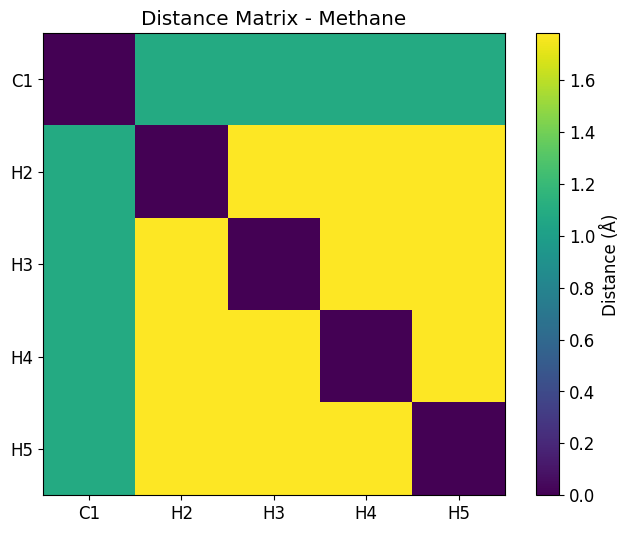

In [11]:
def distance_matrix(structure: Structure) -> np.ndarray:
    """Calculate the distance matrix for all atoms in a structure.
    
    Returns:
        NxN symmetric matrix where element [i,j] is distance between atoms i and j
    """
    n = len(structure)
    positions = structure.get_positions()
    
    # Method 1: Explicit loops (for understanding)
    dist_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = np.linalg.norm(positions[i] - positions[j])
            dist_matrix[i, j] = d
            dist_matrix[j, i] = d
    
    return dist_matrix

def distance_matrix_vectorized(structure: Structure) -> np.ndarray:
    """Vectorized version - much faster for large structures."""
    positions = structure.get_positions()
    # Use broadcasting: (N,1,3) - (1,N,3) = (N,N,3)
    diff = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
    return np.sqrt(np.sum(diff**2, axis=2))

# Calculate and display for methane
dm = distance_matrix(methane)
symbols = methane.get_symbols()

print("Distance Matrix for Methane (Å):")
print("     ", "  ".join([f"{s:>5}" for s in symbols]))
for i, row in enumerate(dm):
    print(f"{symbols[i]:>3}  ", "  ".join([f"{d:5.2f}" for d in row]))

# Visualize with heatmap
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(dm, cmap='viridis')
ax.set_xticks(range(len(symbols)))
ax.set_yticks(range(len(symbols)))
ax.set_xticklabels([f"{s}{i+1}" for i, s in enumerate(symbols)])
ax.set_yticklabels([f"{s}{i+1}" for i, s in enumerate(symbols)])
plt.colorbar(im, label='Distance (Å)')
ax.set_title('Distance Matrix - Methane')
plt.show()

### Quick Note: Vectorization and Broadcasting Explained

The two `distance_matrix` functions compute the same result, but very differently:

**Loop version** (easy to read, slow):
```python
for i in range(n):
    for j in range(i+1, n):
        d = np.linalg.norm(positions[i] - positions[j])
```
- Computes one distance at a time
- Python loop overhead for each pair
- For 1000 atoms: ~500,000 Python loop iterations

**Vectorized version** (harder to read, fast):
```python
diff = positions[:, np.newaxis, :] - positions[np.newaxis, :, :]
```
- Computes ALL distances simultaneously in C/Fortran
- No Python loops — NumPy handles it internally
- For 1000 atoms: ~100× faster

---

### What is Broadcasting?

Broadcasting is NumPy's way of doing operations between arrays of **different shapes** by "stretching" dimensions of size 1.

**Concrete Example: 3 atoms**
```python
positions = np.array([
    [0, 0, 0],    # Atom 0
    [1, 0, 0],    # Atom 1
    [0, 1, 0],    # Atom 2
])
# Shape: (3, 3) → 3 atoms, 3 coordinates (x,y,z) each
```

**Step 1: Reshape with `np.newaxis`**

`np.newaxis` inserts a new axis of size 1:

```
positions[:, np.newaxis, :]  →  shape (3, 1, 3)
┌─────────────┐
│ [[0,0,0]]   │   Atom 0 wrapped in extra []
│ [[1,0,0]]   │   Atom 1 wrapped in extra []
│ [[0,1,0]]   │   Atom 2 wrapped in extra []
└─────────────┘
"3 rows, each containing 1 atom"

positions[np.newaxis, :, :]  →  shape (1, 3, 3)
┌─────────────────────────────┐
│ [[0,0,0], [1,0,0], [0,1,0]] │   All 3 atoms in one row
└─────────────────────────────┘
"1 row containing all 3 atoms"
```

**Step 2: Broadcasting stretches size-1 dimensions**

When we subtract `(3, 1, 3) - (1, 3, 3)`:
```
(3, 1, 3)   ← "3 rows, each with 1 atom"
(1, 3, 3)   ← "1 row with 3 atoms"
─────────
(3, 3, 3)   ← Result: every atom vs every atom
```

NumPy conceptually "copies" the data along size-1 dimensions:
```
positions[:, np.newaxis, :] broadcasts to (3,3,3):
    Atom 0: [[0,0,0], [0,0,0], [0,0,0]]   ← copied 3 times
    Atom 1: [[1,0,0], [1,0,0], [1,0,0]]   ← copied 3 times
    Atom 2: [[0,1,0], [0,1,0], [0,1,0]]   ← copied 3 times

positions[np.newaxis, :, :] broadcasts to (3,3,3):
    Row 0: [[0,0,0], [1,0,0], [0,1,0]]    ← copied 3 times
    Row 1: [[0,0,0], [1,0,0], [0,1,0]]    ← copied 3 times
    Row 2: [[0,0,0], [1,0,0], [0,1,0]]    ← copied 3 times
```

**Step 3: Subtraction gives all pairwise differences**

```
diff[i, j, :] = positions[i] - positions[j]

diff[0,0,:] = [0,0,0] - [0,0,0] = [ 0, 0, 0]  (atom 0 to itself)
diff[0,1,:] = [0,0,0] - [1,0,0] = [-1, 0, 0]  (atom 0 to atom 1)
diff[0,2,:] = [0,0,0] - [0,1,0] = [ 0,-1, 0]  (atom 0 to atom 2)
diff[1,0,:] = [1,0,0] - [0,0,0] = [ 1, 0, 0]  (atom 1 to atom 0)
diff[1,1,:] = [1,0,0] - [1,0,0] = [ 0, 0, 0]  (atom 1 to itself)
... and so on for all 9 pairs
```

**Step 4: Square, sum xyz, take sqrt**
```python
diff**2                    # Square each component: (3,3,3)
np.sum(diff**2, axis=2)    # Sum x² + y² + z²: (3,3)
np.sqrt(...)               # Final distances: (3,3)
```

Result:
```
[[0.00, 1.00, 1.00],
 [1.00, 0.00, 1.41],    ← √2 ≈ 1.41
 [1.00, 1.41, 0.00]]
```

**Complete distance matrix in 3 NumPy operations!**

---

### Performance Comparison

| Method | What happens | Speed |
|--------|-------------|-------|
| Loop | N² Python iterations, each calling norm | Slow |
| Broadcast | 3 optimized C array operations | ~100× faster |

**Rule of thumb**: If you're looping over NumPy arrays element-by-element, there's probably a vectorized way to do it faster.

---

## Practice Exercises

### Exercise 1.1: Build a CO₂ Molecule
Carbon dioxide is linear with C-O bond length of 1.16 Å. Create the structure and verify the O-C-O angle is 180°.

In [23]:
# YOUR CODE HERE
def build_co2() -> Structure:
    """Build a CO2 molecule."""
    #Enter your code here
    pass

# Test your function
# co2 = build_co2()
# plot_structure(co2)
# Verify the angle is 180°

### Exercise 1.2: Calculate All Bond Angles in Water
Write a function that finds all unique bond angles in a structure (considering atoms within bonding distance).

In [ ]:
# YOUR CODE HERE
def find_bonds(structure: Structure, tolerance: float = 0.5) -> List[Tuple[int, int]]:
    """Find all bonded atom pairs based on covalent radii.
    
    Two atoms are considered bonded if their distance is less than
    the sum of their covalent radii plus a tolerance.
    """
    # TODO: Implement bond finding
    pass

def find_all_angles(structure: Structure) -> List[Tuple[int, int, int, float]]:
    """Find all bond angles in the structure.
    
    Returns:
        List of (atom1_idx, central_atom_idx, atom2_idx, angle_in_degrees)
    """
    # TODO: Implement angle finding
    pass

### Exercise 1.3: Build Ethane with Variable Dihedral
Create a function that builds ethane (C₂H₆) with a specified dihedral angle.

In [ ]:
# YOUR CODE HERE
def build_ethane(dihedral_angle: float = 60.0) -> Structure:
    """Build ethane with specified H-C-C-H dihedral angle.
    
    Args:
        dihedral_angle: The dihedral angle in degrees (default: 60° staggered)
    
    C-C bond length: 1.54 Å
    C-H bond length: 1.09 Å
    H-C-C angle: 109.5° (tetrahedral)
    """
    # TODO: Implement ethane builder
    pass

### Exercise 1.4: Molecular Formula
Add a method to the Structure class that returns the molecular formula (e.g., "C6H6" for benzene).

In [ ]:
# YOUR CODE HERE
def get_molecular_formula(structure: Structure) -> str:
    """Return the molecular formula in standard format (C first, then H, then alphabetical)."""
    # TODO: Implement molecular formula generator
    pass

# Test with benzene
# print(get_molecular_formula(benzene))  # Should print "C6H6"

### Exercise 1.5: Center of Mass vs Geometric Center
For the water molecule, calculate both centers and explain why they differ. Which is more physically meaningful?

In [ ]:
# YOUR CODE HERE
# Rebuild water (uncentered)
water_test = Structure("H2O")
water_test.add_atom('O', [0.0, 0.0, 0.0])
water_test.add_atom('H', [0.96, 0.0, 0.0])
water_test.add_atom('H', [0.96 * np.cos(np.radians(104.5)), 
                         0.96 * np.sin(np.radians(104.5)), 0.0])

# TODO: Calculate and compare both centers
# Explain the difference in a comment

---

## Key Takeaways

1. **Atoms are represented as (symbol, position)** where position is a 3D vector in Ångströms
2. **NumPy arrays** are essential for efficient vector operations
3. **Distances** use the Euclidean norm: $d = |\mathbf{r}_2 - \mathbf{r}_1|$
4. **Angles** use the dot product: $\cos\theta = \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{|\mathbf{v}_1||\mathbf{v}_2|}$
5. **Dihedrals** use cross products to find plane normals
6. **The Structure class** provides a foundation for building and manipulating atomic systems

## Next Chapter Preview

In Chapter 2, we'll dive deep into **linear algebra for atomic manipulation**:
- Rotation matrices
- Translation and transformation matrices
- Combining transformations
- Rotating molecules around arbitrary axes